# Random sweeps - Metrics mismatch - 2Try, EM Scaled MSE

Same but with EM scaled MSE, which may behave better.


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import scipy as sp
import scipy.stats as spst
import scipy.interpolate as spint
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.utils import io
import progress

from experimentlauncher import ExperimentLauncher
from dataio import DataIO
import plots_experimental_data

import re
import inspect
import imp

import utils
import load_experimental_data
import highdimensionnetwork
import hierarchicalrandomnetwork

from mpl_toolkits.mplot3d import Axes3D

from plots_fitexperiment_papertheo import PlotsFitExperimentAllTPaperTheo
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

from plotly import offline as py
from plotly import graph_objs as go
py.init_notebook_mode(connected=True)


## Metric mismatch grid plot

In [3]:
def compute_spline_interpolation(df, interpolate_column, x_col='', y_col='', kx=3, ky=3, s=None):
    
    if "std_" + interpolate_column in df:
        w = 1./df["std_" + interpolate_column]
    else:
        w = None
        
    return spint.SmoothBivariateSpline(df[x_col], df[y_col], df[interpolate_column], w=w, kx=kx, ky=ky, s=s)

def pcolor_2d_interpolated(df, target_column, x_col='M', y_col='rc_scale', 
                           title='', vmin=None, vmax=None, cmap='RdBu_r'):
    x_int_space = np.sort(df[x_col].unique())
    y_int_space = np.sort(df[y_col].unique())

    spline_int = compute_spline_interpolation(df, target_column, 
                                              x_col=x_col, y_col=y_col)
    return utils.pcolor_2d_data(spline_int(x_int_space, y_int_space),
                                x=x_int_space, 
                                y=y_int_space, 
                                xlabel=x_col, 
                                xlabel_format="%d", 
                                ylabel=y_col, 
                                title=title,
                                ticks_interpolate=15,
                                vmin=vmin,
                                vmax=vmax,
                                log_scale=False, 
                                cmap=cmap
                               )

In [5]:
%cd /nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch
with io.capture_output(display=False, stdout=False) as captured:
    %run reloader_metricmismatch_2try_ratiosigmax_grid_020118.py

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch
Reloader data generated from  generator_metricmismatch_2try_ratiosigmax_grid_020118.py
Running  /nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/reloader_metricmismatch_2try_ratiosigmax_grid_020118.py
Arguments: []

        Reload outputs run with the automatic parameter generator for PBS

        Should handle random sampling of the parameter space.
    
Reloader data generated from  generator_metricmismatch_2try_ratiosigmax_grid_020118.py
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-5f930d12-bb4a-4721-a98b-3b62974ad671.npy
0.00%, -- left - 15.01 15:52
M 100.00, ratio_conj 0.00, sigmax 0.12
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_r

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-0deee7b1-ed0b-4378-ac5f-ff5b13b99253.npy
1.63%, 5s left - 15.01 15:52
M 99.00, ratio_conj 0.01, sigmax 0.21
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-5c44b2b5-e79e-4990-bbef-b4011580c430.npy
1.67%, 5s left - 15.01 15:52
M 99.00, ratio_conj 0.01, sigmax 0.23
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-5bb3bf8e-82ee-4bb3-823c-4150b9b48b01.npy
1.71%, 5s left - 15.01 15:52
M 99.00, ratio_

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-54e05683-93fb-4ded-a173-d71c2c2bfd67.npy
4.45%, 6s left - 15.01 15:52
M 100.00, ratio_conj 0.04, sigmax 0.01
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-d1b59f53-4382-46c1-97f0-10236e4c3bb8.npy
4.49%, 6s left - 15.01 15:52
M 100.00, ratio_conj 0.04, sigmax 0.09
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-ae5eed6c-b122-4a35-a252-160076d6a37f.npy
4.53%, 6s left - 15.01 15:52
M 100.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-066be9a8-8277-4e27-abe0-1294220addd4.npy
6.65%, 7s left - 15.01 15:52
M 98.00, ratio_conj 0.04, sigmax 0.10
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-90a70ba9-2a17-4bdf-a8a0-16c81e753716.npy
6.69%, 7s left - 15.01 15:52
M 98.00, ratio_conj 0.04, sigmax 0.05
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-7dd90497-e17b-4df0-b285-83983e6efeba.npy
6.73%, 7s left - 15.01 15:52
M 98.00, ratio_

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-681b01fa-ce92-422d-a512-75bb3d8e92fe.npy
9.06%, 7s left - 15.01 15:52
M 96.00, ratio_conj 0.04, sigmax 0.18
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-e78a857a-7630-47ae-9ea7-35dcb0ba2b49.npy
9.10%, 7s left - 15.01 15:52
M 96.00, ratio_conj 0.04, sigmax 0.17
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-bec36289-cd74-4c12-b46c-f22dd75faf13.npy
9.14%, 7s left - 15.01 15:52
M 96.00, ratio_

11.67%, 7s left - 15.01 15:52
M 99.00, ratio_conj 0.09, sigmax 0.28
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-a016f6d6-1300-45a8-a174-6c4f15f995b5.npy
11.71%, 7s left - 15.01 15:52
M 99.00, ratio_conj 0.09, sigmax 0.22
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-f6f24efe-0555-4d62-a25f-a0e39c1e466e.npy
11.76%, 7s left - 15.01 15:52
M 99.00, ratio_conj 0.09, sigmax 0.13
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-93adbf78-60e5-4

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-8b3d7676-c5c8-44ed-b750-d5d4b513e111.npy
14.90%, 6s left - 15.01 15:52
M 95.00, ratio_conj 0.09, sigmax 0.11
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-2c0b4298-a0d0-4a8b-b17b-82e2bea66d02.npy
14.94%, 6s left - 15.01 15:52
M 95.00, ratio_conj 0.09, sigmax 0.17
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-8e55a9f9-0ee3-4c7e-b904-5cbaaee29cb6.npy
14.98%, 6s left - 15.01 15:52
M 95.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-93692169-bfca-4d67-a5d7-edacaef7495e.npy
17.59%, 6s left - 15.01 15:52
M 100.00, ratio_conj 0.16, sigmax 0.19
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-890d14ca-dc08-4a36-9321-2e30db76d9b0.npy
17.63%, 6s left - 15.01 15:52
M 100.00, ratio_conj 0.16, sigmax 0.15
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-6f5bc07b-f241-4418-be35-ee3249950815.npy
17.67%, 6s left - 15.01 15:52
M 100.00, 

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-e2f0f730-ac1a-46ae-a273-6ef4e5768d9f.npy
20.57%, 6s left - 15.01 15:52
M 98.00, ratio_conj 0.16, sigmax 0.19
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-67b4f448-c552-4df9-ba21-c6b133debc02.npy
20.61%, 6s left - 15.01 15:52
M 96.00, ratio_conj 0.17, sigmax 0.11
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-3b604b29-7451-43a2-9340-d4d99205ef9b.npy
20.65%, 6s left - 15.01 15:52
M 98.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-e161c122-bb11-4474-9474-f8919008976f.npy
22.61%, 6s left - 15.01 15:52
M 94.00, ratio_conj 0.17, sigmax 0.04
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-e2046451-c05f-428a-bd2c-99242c01eed5.npy
22.65%, 6s left - 15.01 15:52
M 94.00, ratio_conj 0.17, sigmax 0.09
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-b8dc611c-e85a-4d30-9f2a-d0c59517bd17.npy
22.69%, 6s left - 15.01 15:52
M 94.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-169a9f27-fe98-4a6a-b266-7a12d64c0a2f.npy
24.90%, 6s left - 15.01 15:52
M 92.00, ratio_conj 0.17, sigmax 0.06
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-52e60746-4062-463a-bf9b-f7d27311e435.npy
24.94%, 6s left - 15.01 15:52
M 92.00, ratio_conj 0.17, sigmax 0.09
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-a100bd9e-fada-48a1-af8e-d55b559da2e0.npy
24.98%, 6s left - 15.01 15:52
M 94.00, rat

M 99.00, ratio_conj 0.25, sigmax 0.23
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-1106f759-6262-4060-a128-1374671434d8.npy
28.29%, 5s left - 15.01 15:52
M 99.00, ratio_conj 0.25, sigmax 0.29
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-e47b7fa8-1512-4838-bbfb-5d1810bf2b8e.npy
28.33%, 5s left - 15.01 15:52
M 99.00, ratio_conj 0.25, sigmax 0.28
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-d68ceef5-d9cb-4f63-b374-ad214e6679aa.npy
28.3

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-3ee98cd9-9b6f-44e3-9d6c-e33925f19f29.npy
31.18%, 5s left - 15.01 15:52
M 95.00, ratio_conj 0.26, sigmax 0.08
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-3d740994-7c03-452a-9fda-dd5c7a8b5e09.npy
31.22%, 5s left - 15.01 15:52
M 95.00, ratio_conj 0.26, sigmax 0.09
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-6ce83b95-c021-4179-991c-871260abdf7f.npy
31.27%, 5s left - 15.01 15:52
M 95.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-d76037dc-940c-42d6-aca0-611a58b7e125.npy
34.37%, 5s left - 15.01 15:52
M 100.00, ratio_conj 0.36, sigmax 0.00
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-9e7a66e2-c388-4eba-bea2-eadd4c1c2203.npy
34.41%, 5s left - 15.01 15:52
M 93.00, ratio_conj 0.27, sigmax 0.26
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-00857618-aafc-44a3-a793-a27a4a98562e.npy
34.45%, 5s left - 15.01 15:52
M 91.00, ra

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-7aa62314-1c47-4c49-811b-fff9ec127080.npy
36.90%, 5s left - 15.01 15:52
M 100.00, ratio_conj 0.36, sigmax 0.02
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-aab51d7f-0ed0-4876-bd58-e530cf9fa2ea.npy
36.94%, 5s left - 15.01 15:52
M 100.00, ratio_conj 0.36, sigmax 0.03
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-1c994cd6-6ccf-42eb-b531-5c5a1ba4d84e.npy
36.98%, 5s left - 15.01 15:52
M 100.00, 

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-5414ff9d-8919-42ef-a4a5-29e5fb7b5a60.npy
39.88%, 5s left - 15.01 15:52
M 98.00, ratio_conj 0.37, sigmax 0.18
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-b8ff4fed-890f-42ef-a665-5e1eece8159d.npy
39.92%, 5s left - 15.01 15:52
M 98.00, ratio_conj 0.37, sigmax 0.06
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-d71240d9-6509-4f93-9b84-32ca64ca7898.npy
39.96%, 5s left - 15.01 15:52
M 98.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-4e0fd3be-3cdd-46d8-916f-7ecbea848803.npy
43.14%, 4s left - 15.01 15:52
M 94.00, ratio_conj 0.38, sigmax 0.09
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-b99dc604-5e26-45cf-8c88-fef10e49cb78.npy
43.18%, 4s left - 15.01 15:52
M 94.00, ratio_conj 0.38, sigmax 0.07
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-89d81e07-66af-458a-9efe-212a39d11ced.npy
43.22%, 4s left - 15.01 15:52
M 94.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-e5ed7ea5-06c2-4eda-9638-6401b467e1ca.npy
46.12%, 4s left - 15.01 15:52
M 92.00, ratio_conj 0.39, sigmax 0.21
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-55f560b0-c5d1-4f01-a83e-721539a1cd76.npy
46.16%, 4s left - 15.01 15:52
M 92.00, ratio_conj 0.39, sigmax 0.12
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-b0962055-71f1-4caf-8c10-8c695a12bbfd.npy
46.20%, 4s left - 15.01 15:52
M 92.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-8386cf52-371e-4795-8c8d-e32e3fd69b26.npy
47.71%, 4s left - 15.01 15:52
M 90.00, ratio_conj 0.40, sigmax 0.13
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-ffc4411f-547a-4460-98fd-9c5d3ca5d595.npy
47.76%, 4s left - 15.01 15:52
M 90.00, ratio_conj 0.40, sigmax 0.09
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-ad1ba50b-e001-4648-a4da-49623fef87c7.npy
47.80%, 4s left - 15.01 15:52
M 90.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-0f18add6-cb0f-490d-bc2d-05fdab92353a.npy
50.53%, 4s left - 15.01 15:52
M 88.00, ratio_conj 0.41, sigmax 0.25
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-9d240b8f-c52e-4f93-9b06-77da2aaea969.npy
50.57%, 4s left - 15.01 15:52
M 88.00, ratio_conj 0.41, sigmax 0.24
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-c07051f9-8518-4a98-ba35-c8a3bbc0db1b.npy
50.61%, 4s left - 15.01 15:52
M 88.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-ea77cff2-e4af-498d-8c28-e3e3568786b8.npy
54.16%, 3s left - 15.01 15:52
M 95.00, ratio_conj 0.52, sigmax 0.18
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-7284d305-78d3-48ce-aa17-0691f9b749fc.npy
54.20%, 3s left - 15.01 15:52
M 95.00, ratio_conj 0.52, sigmax 0.23
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-9eeef831-c3cf-4827-9dd9-2cedbd5a46b0.npy
54.24%, 3s left - 15.01 15:52
M 95.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-1ecf7314-754a-493a-b13b-c2cb09abeef6.npy
56.69%, 3s left - 15.01 15:52
M 93.00, ratio_conj 0.53, sigmax 0.29
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-3c618987-2c81-4470-9f36-f971164a8adb.npy
56.73%, 3s left - 15.01 15:52
M 93.00, ratio_conj 0.53, sigmax 0.26
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-de2cdc90-b4a0-4b91-83ad-186b0ee68448.npy
56.78%, 3s left - 15.01 15:52
M 93.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-c72f6d2a-441f-4417-b788-c9738c321a3b.npy
59.22%, 3s left - 15.01 15:52
M 89.00, ratio_conj 0.55, sigmax 0.07
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-72e669d5-8dff-4851-8f5b-1f8c022da721.npy
59.27%, 3s left - 15.01 15:52
M 91.00, ratio_conj 0.54, sigmax 0.28
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-e62b4a9a-ffab-45dc-bede-4a69542d522e.npy
59.31%, 3s left - 15.01 15:52
M 91.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-2f4e91f0-5d43-45f3-a933-c93c0c0c44de.npy
61.96%, 3s left - 15.01 15:52
M 87.00, ratio_conj 0.56, sigmax 0.19
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-9c64aa47-2807-4da3-adf3-c18612e8d7b4.npy
62.00%, 3s left - 15.01 15:52
M 87.00, ratio_conj 0.56, sigmax 0.13
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-e5cdfda1-2ed3-47fc-9126-208f5e70a9e6.npy
62.04%, 3s left - 15.01 15:52
M 87.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-d2eb4e17-6e5b-4de7-af56-4ea273dfcf38.npy
64.29%, 3s left - 15.01 15:52
M 85.00, ratio_conj 0.58, sigmax 0.17
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-dc356413-9ded-450a-910a-ca727df5131d.npy
64.33%, 3s left - 15.01 15:52
M 85.00, ratio_conj 0.58, sigmax 0.30
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-adf41bc3-7d81-4e85-82fb-210088a1695a.npy
64.37%, 3s left - 15.01 15:52
M 85.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-af604a86-858a-4466-9a13-ed95db95633d.npy
67.55%, 2s left - 15.01 15:52
M 96.00, ratio_conj 0.67, sigmax 0.23
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-08d4ad02-5265-4553-909d-111ee3dc1742.npy
67.59%, 2s left - 15.01 15:52
M 96.00, ratio_conj 0.67, sigmax 0.21
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-8e2de992-4d81-485a-b1a2-028c16cb829d.npy
67.63%, 2s left - 15.01 15:52
M 96.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-0919535d-d4bb-4d7c-81f9-6a705bfb6964.npy
69.59%, 2s left - 15.01 15:52
M 94.00, ratio_conj 0.68, sigmax 0.03
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-5c95c4d4-2252-4ef0-9cd2-0d21d3413a77.npy
69.63%, 2s left - 15.01 15:52
M 94.00, ratio_conj 0.68, sigmax 0.06
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-c2c59b86-dc4f-4eca-8d65-a6ab2ec5bec3.npy
69.67%, 2s left - 15.01 15:52
M 94.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-34d5e7ba-6dff-407b-9cfb-b65fca8f3380.npy
72.41%, 2s left - 15.01 15:52
M 92.00, ratio_conj 0.70, sigmax 0.15
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-cfa9a28a-2087-4e7d-800b-8bc420f7c2c0.npy
72.45%, 2s left - 15.01 15:52
M 92.00, ratio_conj 0.70, sigmax 0.26
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-cef38bfd-dab9-4e35-ba40-c6cf0d40ddc5.npy
72.49%, 2s left - 15.01 15:52
M 92.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-423dac61-3362-4e3c-abef-888fb7378fad.npy
74.20%, 2s left - 15.01 15:52
M 90.00, ratio_conj 0.71, sigmax 0.13
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-bcccb5a7-470b-413e-a1a0-fa3f4b361970.npy
74.24%, 2s left - 15.01 15:52
M 90.00, ratio_conj 0.71, sigmax 0.19
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-bbd3b922-0c5d-4cf2-a358-472947e11caf.npy
74.29%, 2s left - 15.01 15:52
M 90.00, rat

75.18%, 2s left - 15.01 15:52
M 90.00, ratio_conj 0.71, sigmax 0.24
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-a0f209ea-beb9-4b01-b0ab-2c80cde72b54.npy
75.22%, 2s left - 15.01 15:52
M 90.00, ratio_conj 0.71, sigmax 0.17
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-d780c829-6937-4c1a-82dd-73cc7be15876.npy
75.27%, 2s left - 15.01 15:52
M 90.00, ratio_conj 0.71, sigmax 0.29
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-f5009d7c-345d-4

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-a2dc912f-203e-4c2c-bc1a-9d1a84360775.npy
76.94%, 2s left - 15.01 15:52
M 88.00, ratio_conj 0.73, sigmax 0.17
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-62155b81-0ac8-45e5-b419-3d9047ad438e.npy
76.98%, 2s left - 15.01 15:52
M 88.00, ratio_conj 0.73, sigmax 0.05
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-a1d86338-4a20-4d52-b457-09d442fcd095.npy
77.02%, 2s left - 15.01 15:52
M 88.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-a8c0e8cf-281f-43b9-93d6-242f1a81b4ea.npy
78.29%, 2s left - 15.01 15:52
M 86.00, ratio_conj 0.74, sigmax 0.06
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-bb815217-0d02-4cde-8b79-1ac015190419.npy
78.33%, 2s left - 15.01 15:52
M 86.00, ratio_conj 0.74, sigmax 0.13
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-d5fb57c3-a3f2-4065-8fad-f7b76f4cacb0.npy
78.37%, 2s left - 15.01 15:52
M 86.00, rat

M 84.00, ratio_conj 0.76, sigmax 0.29
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-07c80a7a-c5c9-4412-9552-6981abe41849.npy
81.18%, 2s left - 15.01 15:52
M 84.00, ratio_conj 0.76, sigmax 0.24
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-9b2abbdb-cb5c-4d5f-8a36-61263f331e77.npy
81.22%, 2s left - 15.01 15:52
M 84.00, ratio_conj 0.76, sigmax 0.23
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-ced7da28-e0f1-42ce-aec0-be67ba7f9bb9.npy
81.2

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-8c666d75-170f-4463-84aa-d1f550578035.npy
83.96%, 1s left - 15.01 15:52
M 97.00, ratio_conj 0.84, sigmax 0.10
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-82c9ed20-4720-4227-9482-64b5fc60b490.npy
84.00%, 1s left - 15.01 15:52
M 97.00, ratio_conj 0.84, sigmax 0.11
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-db31cec9-f416-44e3-8b89-2138987eb6ac.npy
84.04%, 1s left - 15.01 15:52
M 97.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-689d7bb9-1fc1-414a-b979-ddfa0ac652de.npy
86.41%, 1s left - 15.01 15:52
M 97.00, ratio_conj 0.84, sigmax 0.18
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-2a34821a-490f-4e63-ba15-d6b998079178.npy
86.45%, 1s left - 15.01 15:52
M 95.00, ratio_conj 0.85, sigmax 0.26
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-d515e9c7-b375-495e-8d92-6065c03fdb02.npy
86.49%, 1s left - 15.01 15:52
M 95.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-764d6041-e09b-4a41-9f38-f02009fdef95.npy
88.49%, 1s left - 15.01 15:52
M 91.00, ratio_conj 0.89, sigmax 0.01
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-b9b23fcd-a451-442c-a312-d529308cb8d7.npy
88.53%, 1s left - 15.01 15:52
M 93.00, ratio_conj 0.87, sigmax 0.17
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-917b5ded-de9c-4d3e-9988-e25ea4b0958b.npy
88.57%, 1s left - 15.01 15:52
M 93.00, rat

M 89.00, ratio_conj 0.91, sigmax 0.00
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-b85e44dd-58cb-463f-aad8-ddecd16054ca.npy
91.35%, 1s left - 15.01 15:52
M 89.00, ratio_conj 0.91, sigmax 0.01
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-3b8f389a-5180-4dc0-923a-6195063ecf4d.npy
91.39%, 1s left - 15.01 15:52
M 89.00, ratio_conj 0.91, sigmax 0.01
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-57f10ab5-9953-4e25-8d72-133948f5a54e.npy
91.4

94.24%, 1s left - 15.01 15:52
M 87.00, ratio_conj 0.93, sigmax 0.07
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-4b9e4ff5-5191-44b5-ad02-39ba08070374.npy
94.29%, 0s left - 15.01 15:52
M 87.00, ratio_conj 0.93, sigmax 0.08
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-a06555c4-b079-4a6c-ad46-3942eb3cbb85.npy
94.33%, 0s left - 15.01 15:52
M 87.00, ratio_conj 0.93, sigmax 0.12
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-6320324c-69e9-4

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-3c0d7e48-0f8a-412a-ac9e-6663e32507a5.npy
96.04%, 0s left - 15.01 15:52
M 85.00, ratio_conj 0.95, sigmax 0.07
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-7c06faca-deba-46f4-84c3-f41f4cc7c160.npy
96.08%, 0s left - 15.01 15:52
M 85.00, ratio_conj 0.95, sigmax 0.13
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-a37e7045-1ae6-4391-a030-2ab2dd03eb85.npy
96.12%, 0s left - 15.01 15:52
M 85.00, rat

/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-8102eae7-ea45-454b-8a00-350d296155a8.npy
98.57%, 0s left - 15.01 15:52
M 100.00, ratio_conj 1.00, sigmax 0.11
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-b689c332-120f-47e7-b170-5df63d54d3a4.npy
98.61%, 0s left - 15.01 15:52
M 100.00, ratio_conj 1.00, sigmax 0.10
/nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118-launcher_do_fitexperiment_allmetrics-8792c332-6460-4817-bd8b-fe7a8727024a.npy
98.65%, 0s left - 15.01 15:52
M 100.00, 

Found new results_shape: (4, 500, 3)
result_ll_n flat dimensions: 2450 of (4, 500, 3)
Found new results_shape: (4, 3)
result_bic flat dimensions: 2450 of (4, 3)
Found new results_shape: (4, 3)
result_ll90_sum flat dimensions: 2450 of (4, 3)
Found new results_shape: (4, 3)
result_precision flat dimensions: 2450 of (4, 3)
Found new results_shape: (4, 3)
result_ll_median flat dimensions: 2450 of (4, 3)
Found new results_shape: (4, 6, 3)
result_em_fits flat dimensions: 2450 of (4, 6, 3)
Found new results_shape: (4, 4, 3)
result_emfit_mse flat dimensions: 2450 of (4, 4, 3)
Found new results_shape: (4, 4, 3)
result_emfit_mse_scaled flat dimensions: 2450 of (4, 4, 3)
Found new results_shape: (4, 3)
result_emfit_mixt_kl flat dimensions: 2450 of (4, 3)


In [7]:
dataio = DataIO(output_folder=generator_module.pbs_submission_infos['simul_out_dir'] + '/outputs/', 
                calling_function='',
                label=dataset_infos['save_output_filename'] + "_scaled")
dataio.make_link_output_to_dropbox(dropbox_current_experiment_folder='thesis_plots/random_sweeps_metrics_mismatch')

=== FileIO ready: /nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/outputs/metricmismatch_bays09_ratiosigmax_scaled-e7cd2fa8-bccc-4d28-a279-31d8d451e775 ===
Doing dropbox symlink:  /nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/outputs/ /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Experiments/thesis_plots/random_sweeps_metrics_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118_outputs
Symlink failed:  /nfs/data3/lmatthey/visual_working_mem/thesis_plots/random_sweeps_metric_mismatch/metricmismatch_ratiosigmax_grid_2try_repetitions3_130118/outputs/ /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Experiments/thesis_plots/random_sweeps_metrics_mismatch/metricmismatch_rati

In [21]:
# Extract data
result_ll_sum_flat = np.array(data_pbs.dict_arrays['result_ll_sum']['results_flat'])
result_ll90_sum_flat = np.array(data_pbs.dict_arrays['result_ll90_sum']['results_flat'])
result_ll_median_flat = np.array(data_pbs.dict_arrays['result_ll_median']['results_flat'])
result_precision_flat = np.array(data_pbs.dict_arrays['result_precision']['results_flat'])
result_em_fits_flat = np.array(data_pbs.dict_arrays['result_em_fits']['results_flat'])
result_emfit_mse_flat = np.array(data_pbs.dict_arrays['result_emfit_mse']['results_flat'])
result_emfit_mse_scaled_flat = np.array(data_pbs.dict_arrays['result_emfit_mse_scaled']['results_flat'])
result_emfit_mixt_kl_flat = np.array(data_pbs.dict_arrays['result_emfit_mixt_kl']['results_flat'])

result_parameters_flat = np.array(data_pbs.dict_arrays['result_ll_sum']['parameters_flat'])
all_repeats_completed = data_pbs.dict_arrays['result_ll_sum']['repeats_completed']

M_space = np.unique(result_parameters_flat[:, 0])
ratio_conj_space = np.unique(result_parameters_flat[:, 1])
sigmax_space = np.unique(result_parameters_flat[:, 2])

num_repetitions = generator_module.num_repetitions
parameter_names_sorted = data_pbs.dataset_infos['parameters']

result_parameters_flat = result_parameters_flat[all_repeats_completed == (num_repetitions - 1)]
all_args_arr = np.array(data_pbs.loaded_data['args_list'])

# Compute lots of averages over the repetitions
result_ll_sum_avg = utils.nanmean(result_ll_sum_flat, axis=-1)
result_ll90_sum_avg = utils.nanmean(result_ll90_sum_flat, axis=-1)
result_em_fits_avg = utils.nanmean(result_em_fits_flat, axis=-1)
result_emfit_mse_avg = utils.nanmean(result_emfit_mse_flat, axis=-1)
result_emfit_mse_scaled_avg = utils.nanmean(result_emfit_mse_scaled_flat, axis=-1)
result_emfit_mixt_kl_avg = utils.nanmean(result_emfit_mixt_kl_flat, axis=-1)
result_ll_median_avg = utils.nanmean(result_ll_median_flat, axis=-1)

# Compute best results
result_dist_emfit_mse = np.nansum(np.nansum(result_emfit_mse_avg, axis=-1), axis=-1)
result_dist_emfit_mse_scaled = np.nansum(np.nansum(result_emfit_mse_scaled_avg, axis=-1), axis=-1)
result_dist_emfit_fidelity = np.nansum(result_emfit_mse_avg[..., 0], axis=-1)
result_dist_emfit_kl = np.nansum(result_emfit_mixt_kl_avg, axis=-1)
result_dist_nll = np.nansum(-result_ll_sum_avg, axis=-1)
result_dist_nll90 = np.nansum(-result_ll90_sum_avg, axis=-1)
result_dist_nll_median = np.nansum(-result_ll_median_avg, axis=-1)

# Get the best fitting parameters
best_params_em = np.argsort(result_dist_emfit_mse)
best_params_kl = np.argsort(result_dist_emfit_kl)
best_params_ll = np.argsort(result_dist_nll)
best_params_ll90 = np.argsort(result_dist_nll90)

# Pandas
df_all_fits = pd.DataFrame.from_items([('M', result_parameters_flat[:, 0]),
                                       ('ratio_conj', result_parameters_flat[:, 1]),
                                       ('sigmax', result_parameters_flat[:, 2]),
                                       ('dist_emfit_mse', result_dist_emfit_mse),
                                       ('dist_emfit_mse_scaled', result_dist_emfit_mse_scaled),
                                       ('dist_emfit_fidelity', result_dist_emfit_fidelity),
                                       ('dist_emfit_kl', result_dist_emfit_kl),
                                       ('dist_nll', result_dist_nll),
                                       ('dist_nll90', result_dist_nll90),
                                       ('dist_nll_median', result_dist_nll_median),
                                      ])
df_all_fits = df_all_fits.assign(dist_emfit_mse_log = lambda x: np.log(x['dist_emfit_mse']),
                                 dist_emfit_kl_log = lambda x: np.log(x['dist_emfit_kl']),
                                 dist_nll_log = lambda x: np.log(x['dist_nll']),
                                 dist_nll90_log = lambda x: np.log(x['dist_nll90']),
                                )


In [22]:
# Remove outliers
df_fits_filtered = utils.remove_outliers(df_all_fits, 5)

# Keep M=100 only
# df_fits_filtered = df_fits_filtered[df_fits_filtered.M == 100]

In [23]:
# f, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].scatter(result_parameters_flat[:, 1], result_parameters_flat[:, 2], c=result_dist_emfit_mse)
# axes[1].scatter(result_parameters_flat[:, 1], result_parameters_flat[:, 2], c=result_dist_emfit_kl)

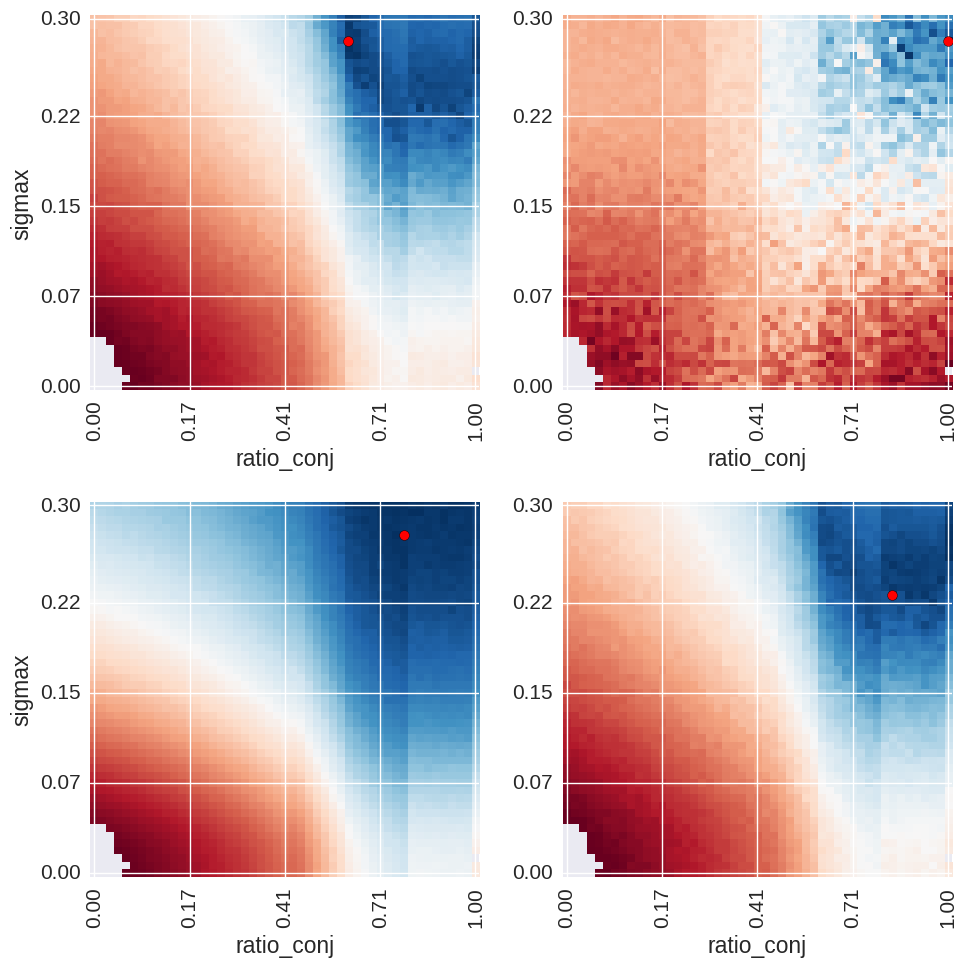

In [36]:
data_mse_scaled = df_fits_filtered.pivot_table(index='ratio_conj', 
                                               columns='sigmax', 
                                               values='dist_emfit_mse_scaled').as_matrix()
data_mse = df_fits_filtered.pivot_table(index='ratio_conj', 
                                            columns='sigmax', 
                                            values='dist_emfit_mse').as_matrix()
data_kl = df_fits_filtered.pivot_table(index='ratio_conj', 
                                            columns='sigmax', 
                                            values='dist_emfit_kl').as_matrix()
data_nll = df_fits_filtered.pivot_table(index='ratio_conj', 
                                            columns='sigmax', 
                                            values='dist_nll').as_matrix()


f, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
utils.pcolor_2d_data(data_mse, x=ratio_conj_space, y=sigmax_space, 
                     xlabel="ratio_conj", ylabel="sigmax", xlabel_format = "%.2f", colorbar=False,
                     ticks_interpolate=5, cmap='RdBu_r', log_scale=True, ax_handle=axes[0])
utils.pcolor_2d_data(data_kl, x=ratio_conj_space, y=sigmax_space, 
                     xlabel="ratio_conj", xlabel_format = "%.2f", colorbar=False,
                     ticks_interpolate=5, cmap='RdBu_r', log_scale=True, ax_handle=axes[1])
utils.pcolor_2d_data(data_nll, x=ratio_conj_space, y=sigmax_space, 
                     xlabel="ratio_conj", ylabel="sigmax", xlabel_format = "%.2f", colorbar=False,
                     ticks_interpolate=5, cmap='RdBu_r', log_scale=True, ax_handle=axes[2])
utils.pcolor_2d_data(data_mse_scaled, x=ratio_conj_space, y=sigmax_space, 
                     xlabel="ratio_conj", xlabel_format = "%.2f", colorbar=False,
                     ticks_interpolate=5, cmap='RdBu_r', log_scale=True, ax_handle=axes[3])


# Best points
best_mse = np.unravel_index(np.nanargmin(data_mse), data_nll.shape)
best_kl = np.unravel_index(np.nanargmin(data_kl), data_nll.shape)
best_nll = np.unravel_index(np.nanargmin(data_nll), data_nll.shape)
best_mse_scaled = np.unravel_index(np.nanargmin(data_mse_scaled), data_nll.shape)

axes[0].scatter(best_mse[0], best_mse[1], c='red', s=50)
axes[1].scatter(best_kl[0], best_kl[1], c='red', s=50)
axes[2].scatter(best_nll[0], best_nll[1], c='red', s=50)
axes[3].scatter(best_mse_scaled[0], best_mse_scaled[1], c='red', s=50)

f.tight_layout()

In [37]:
f.savefig(dataio.create_formatted_filename("metricmismatch_withscaledemfit_{label}_{unique_id}.pdf"))

## Quantize parameters

In [218]:
# Quantize parameters to smooth stuff up a bit

nQuantiles = 25
parameters = ['ratio_conj', 'sigmax']

df_fits_quants, param_qbins, param_qbins_middle = utils.df_add_quantize_parameters(
    df_fits_filtered, parameters, nQuantiles)
df_fits_q_avg = df_fits_quants.groupby(('ratio_conj_qi', 'sigmax_qi')).mean().reset_index()

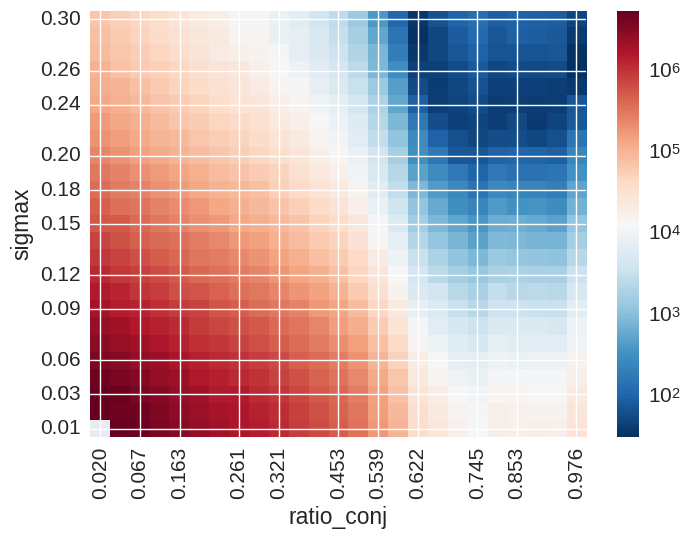

In [220]:
data_q_ratio_sigmax = df_fits_q_avg.pivot_table(index='ratio_conj_qi', 
                                                columns='sigmax_qi', 
                                                values='dist_emfit_mse'
                                               ).as_matrix()

ax, _ = utils.pcolor_2d_data(data_q_ratio_sigmax, 
                             x=param_qbins_middle['ratio_conj'], y=param_qbins_middle['sigmax'], 
                             xlabel="ratio_conj", ylabel="sigmax", xlabel_format = "%.3f", 
                             ticks_interpolate=11, cmap='RdBu_r', log_scale=True)